<a href="https://colab.research.google.com/github/pramit46/LLMTry/blob/main/LangGraph/LangGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Langgraph

In [ ]:
!pip install -q langgraph langchain_groq

In [ ]:
from typing import TypedDict, Annotated
import langgraph
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from google.colab import userdata
from langchain_groq import ChatGroq
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory

In [ ]:
class TypedStructure(TypedDict):
  #input:str
  #output:str
  #context_len:int
  #context:str
  messages:Annotated[list, add_messages]

In [ ]:
llm=ChatGroq(groq_api_key=userdata.get('groq_api_key'),model_name="Gemma2-9b-It")
print(llm)

In [ ]:
memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)
conversation = ConversationChain(llm=llm, memory=memory, verbose=True)

In [ ]:
def chatbot(ts=TypedStructure):
  return{"messages":llm.invoke(ts["messages"])}

In [ ]:
graph_builder=StateGraph(TypedStructure)

graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot", END)
graph=graph_builder.compile()

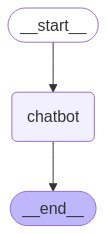

In [ ]:
from IPython.display import display, Image
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
  print(e)

In [ ]:
while True:
    user_input=input("User: ")
    if user_input.lower() in ["exit","q","quit"]:
      break
    for event in graph.stream({'messages':('user', user_input)}):
      #print(event.values())
      for value in event.values():
        print(f"\nAssistant: {value['messages'].content}")


User: who am i

Assistant: As an AI, I don't have access to any personal information about you, including your identity.

To figure out who you are, I suggest reflecting on:

* **Your values and beliefs:** What is important to you? What do you stand for?
* **Your interests and passions:** What do you enjoy doing? What are you curious about?
* **Your relationships:** Who are the important people in your life? What do you value in your relationships?
* **Your experiences:** What has shaped who you are? What have you learned from your life experiences?

Exploring these areas can help you gain a better understanding of yourself.

User: who are you?

Assistant: I am Gemma, an open-weights AI assistant. I am a large language model trained by Google DeepMind.My purpose is to help people by understanding and responding to their requests in a helpful, informative, and comprehensive way.

Here are some key things to know about me:

* **Open-weights:** My weights are publicly available, meaning a

# Conditional Edges

In [1]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 10.1 MB/s eta 0:00:00


In [2]:
from typing import TypedDict, Literal
import langgraph
from langgraph.graph import StateGraph, Graph, START, END
import datetime as dt
from google.colab import userdata
from IPython.display import display, Image
import random

In [3]:
class DataStructure(TypedDict):
  #message_id:int
  message:str
  #date_of_message:str



def getLLM():
  llm=ChatGroq(groq_api_key=userdata.get("groq_api_key"), model_name="Gemma2-9b-It")
  return llm


# Define a starting node. This node just returns a predefined string.
def weather(str):
  return "Hi! Well.. I have no idea... But... "


# Define a node that returns rainy weather
def rainy_weather(str):
  return str + " Its going to rain today. Carry an umbrella."


#Define a node that returns sunny weather
def sunny_weather(str):
  return str + " Its going to be sunny today. Wear sunscreen."


def forecast_weather(str)->Literal["rainy", "sunny"]:
  if random.random() < 0.5:
    return "rainy"
  else:
    return "sunny"


def chatbot(ds=DataStructure):
  message=ds["message"]
  print(f"User: {message}")
  #message_id=message_id+1
  date_of_message=dt.datetime.now().strftime("%Y-%m-%d")
  #llm=getLLM()
  #llm_op=llm.invoke(message)
  llm_op={"message1":"Crime Master Gogo!!!"}
  print(f"Assistant: {llm_op['message1']}")
  return llm_op

In [4]:
graphBuilder=None
graphBuilder=Graph()

#graphBuilder.add_node("chatbot", chatbot)
#graphBuilder.add_edge(START, "chatbot")
##graphBuilder.add_conditional_edges("chatbot", decide)
##graphBuilder.add_edge(decide, END)
#graphBuilder.add_edge("chatbot", END)

graphBuilder.add_node("weather", weather)
graphBuilder.add_node("rainy", rainy_weather)
graphBuilder.add_node("sunny", sunny_weather)

graphBuilder.add_edge(START, "weather")
graphBuilder.add_conditional_edges("weather", forecast_weather)
graphBuilder.add_edge("rainy", END)
graphBuilder.add_edge("sunny", END)


graph=graphBuilder.compile()

In [5]:
display(Image(graph.get_graph().draw_mermaid_png()))

ReadTimeout: HTTPSConnectionPool(host='mermaid.ink', port=443): Read timed out. (read timeout=10)

In [10]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["exit","q","quit"]:
    break
  DataStructure={"message":user_input}
  print(graph.invoke(DataStructure))

User: what is the weather like?
Hi! Well.. I have no idea... But...  Its going to rain today. Carry an umbrella.
User: how are you?
Hi! Well.. I have no idea... But...  Its going to rain today. Carry an umbrella.
User: hey
Hi! Well.. I have no idea... But...  Its going to be sunny today. Wear sunscreen.
User: q


In [11]:
DataStructure={
    "message":"Hi! What does the weather look like?"
}
llm=weather(DataStructure)
llm

'Hi! Well.. I have no idea... But... '